In [1]:
from lblcrn.crn_sym import *
from lblcrn.bulk_crn import *
import matplotlib.pyplot as plt

In [2]:
sm = SpeciesManager()

#[535.0 , 532.2 , 530.9 , 530.0 , 531.6 ,  531.6 ,  533.2, 535.0]
#[y1, x2, x3, x4, x53, x54, x6, x7]
y1 = sm.sp('y1', Orbital('1s', 535.0))
x2 = sm.sp('x2', Orbital('1s', 532.2))
x3 = sm.sp('x3', Orbital('1s', 530.9))
x4 = sm.sp('x4', Orbital('1s', 530.0))
x53 = sm.sp('x53', Orbital('1s', 531.6))
x54 = sm.sp('x54', Orbital('1s', 531.6))
x6 = sm.sp('x6', Orbital('1s', 533.2))
x7 = sm.sp('x7', Orbital('1s', 535.0))

rsys = RxnSystem(
    sm,
    
    Rxn(x4 + y1, x54, 0.000010),
    Rxn(x3 + y1, x53, 0.000004),
    RevRxn(x54, x3 + x3, 6.220646, 0.160755),
    Rxn(x53, x2 + x3, 0.299507),
    Rxn(x54, x2 + x4, 0.167130),
    Rxn(x2, y1, 6.123512),
    Rxn(y1, x2, 0.000002),
    Rxn(x53, y1 + x3, 2.316049),
    Rxn(x54, x4 + y1, 0.984385),
    Rxn(x53 + y1, x6, 0.000003),
    Rxn(x6, x53 + y1, 3.040734),
    RevRxn(x4 + x4, x7, 0.007396, 135.206273),

    Conc(y1, 1),
    Conc(x4, 0.25),
)

In [6]:
s = simulate(rsys, time_max=100)

NameError: name 'simulate' is not defined

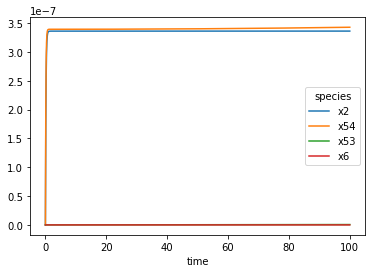

In [4]:
s.plot(ignore=[y1, x4, x3, x7])

In [ ]:
import pandas as pd
x = read_new_data('./data/1e-6_rt.txt')[0]
x = pd.Series(data=x.intensity, index=x.binding_energy)
s.xps.experimental = x

In [ ]:
s.xps.df

In [ ]:
sm = SpeciesManager()

#[535.0 , 532.2 , 530.9 , 530.0 , 531.6 ,  531.6 ,  533.2, 535.0]
#[y1, x2, x3, x4, x53, x54, x6, x7]
y1 = sm.sp('y1', Orbital('1s', 535.0))
x2 = sm.sp('x2', Orbital('1s', 532.2))
x3 = sm.sp('x3', Orbital('1s', 530.9))
x4 = sm.sp('x4', Orbital('1s', 530.0))
x53 = sm.sp('x53', Orbital('1s', 531.6))
x54 = sm.sp('x54', Orbital('1s', 531.6))
x6 = sm.sp('x6', Orbital('1s', 533.2))
x7 = sm.sp('x7', Orbital('1s', 535.0))

rsys = RxnSystem(
    Rxn(x4 + y1, x54, 3.207654),
    Rxn(x3 + y1, x53, 1.363342),
    RevRxn(x54, x3 + x3, 6.220646,0.160755),
    Rxn(x53, x2 + x3, 0.299507),
    Rxn(x54, x2 + x4, 0.167130),
    Rxn(x2, y1, 1.939313),
    Rxn(y1, x2, 0.515646),
    Rxn(x53, y1 + x3, 0.733491),
    Rxn(x54, x4 + y1, 0.311754),
    Rxn(x53 + y1, x6, 1.038423),
    Rxn(x6, x53 + y1, 0.962999),
    RevRxn(x4 + x4, x7, 0.002342,426.922895),
    sm,
    
    Conc(y1, 1),
    Conc(x4, 0.25),
)

In [8]:
s = simulate(rsys, time_max=100)

In [9]:
"""s = Solution([0], [[0.0022156623108634857], [0.2928109811623684], [0.14350942943370512],
                                           [-1.3603329550499852e-07], [0.37135369150675607], [0.05746675110874676],
                                           [0.0008910289031503243], [0.12109413367954226]], rsys)
s.states = {x53: [0.14350942943370512], x54: [0.0022156623108634857], x6: [0.05746675110874676],
            x7: [-1.3603329550499852e-07], x2: [0.12109413367954226], x4: [0.0008910289031503243], 
            y1: [0.37135369150675607], x3: [0.2928109811623684]}"""
x = read_new_data('./data/1e-6_rt.txt')
s.set_experimental(x[0])

In [10]:
s.final_state()

{x54: 0.002215660913588732,
 x53: 0.1435094294328195,
 y1: 0.3713536928860741,
 x6: 0.057466751108170844,
 x7: -3.818078411218383e-07,
 x2: 0.12109413367827071,
 x4: 0.0008915218291837836,
 x3: 0.29281098120482446}

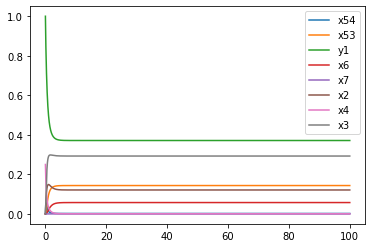

In [11]:
s.basic_plot()

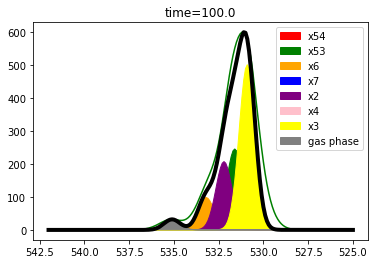

In [12]:
s.plot(exp_type='spectro', envelope=True, ignore=[y1], gas_interval=(535, 537))